## IMPORTING IMP LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings ('ignore')

In [3]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

## READNING AND CLEANING DATA

In [5]:
bike_sharing = pd.read_csv("day.csv")

In [6]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike_sharing.shape

(730, 16)

In [8]:
# checking for the null values in column data

bike_sharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## DEDUCTIONS

- AS WE CAN SEE THEIR ARE NO MISSING VALUES BECAUSE COUNT OF COLUMNS IN ITS SHAPE AND NON NULL VALUES FROM ITS INFO IS SIMILAR.
- EXCEPT ONE COLUMN, ALL OTHER ARE EITHER FLOAT OR INTEGER TYPE & ONE COLUMN IS DATE TYPE.

In [9]:
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## DEDUCTIONS

- LOOKING AT THE DATA, THERE SEEMS TO BE SOME FIELDS THAT ARE CATEGORICAL IN NATURE, BUT IN INTEGER/FLOAT TYPE.
- WE WILL ANALYSE AND FINALIZE WHETHER TO CONVERT THEM TO CATEGORICAL OR TREAT AS INTEGER.


## DUPLICATE CHECK

In [11]:
dup = bike_sharing.copy()

# Checking for duplicates and dropping the entire duplicate row if any
dup.drop_duplicates(subset=None, inplace=True)

In [12]:
dup.shape

(730, 16)

In [13]:
bike_sharing.shape

(730, 16)

## DEDUCTIONS

- AS WE CAN SEE THEIR WAS NO CHANGE IN SHAPE OF DATAFRAME. HENCE , WE CAN CONCLUDE THAT THEIR WERE NO DUPLICATE DATA VALUES.

## DROPPING REDUNDANT COLUMNS

BASED ON THE HIGH LEVEL LOOK AT THE DATA AND THE DATA DICTIONARY, THE FOLLOWING VARIABLES CAN BE REMOVED FROM FURTHER ANALYSIS:
1.	INSTANT : ITS ONLY AN INDEX VALUE
2.	DTEDAY : THIS HAS THE DATE, SINCE WE ALREADY HAVE SEPERATE COLUMNS FOR 'YEAR' & 'MONTH',HENCE, WE COULD LIVE WITHOUT THIS COLUMN.
3.	CASUAL & REGISTERED : BOTH THESE COLUMNS CONTAINS THE COUNT OF BIKE BOOKED BY DIFFERENT CATEGORIES OF CUSTOMERS. SINCE OUR OBJECTIVE IS TO FIND THE TOTAL COUNT OF BIKES AND NOT BY SPECIFIC CATEGORY, WE WILL IGNORE THESE TWO COLUMNS. MORE OVER, WE HAVE CREATED A NEW VARIABLE TO HAVE THE RATIO OF THESE CUSTOMER TYPES.


In [14]:
# Droping instant column as it is index column which has nothing to do with target
bike_sharing.drop(['instant'], axis = 1, inplace = True)

In [15]:
# Dropping dteday as we have already have month and weekday columns to work with
bike_sharing.drop(['dteday'], axis = 1, inplace = True)

In [16]:
# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

bike_sharing.drop(['casual'], axis = 1, inplace = True)
bike_sharing.drop(['registered'], axis = 1, inplace = True)

In [17]:
#Inspect data frame after dropping
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### CONVERT SEASON AND WEATHERSIT TO CATEGORICAL TYPES

In [19]:
bike_sharing.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike_sharing.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike_sharing.mnth = bike_sharing.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike_sharing.weekday = bike_sharing.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
# check the column info of the dataset

bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## DATA VISUALISATION 

<Figure size 1080x2160 with 0 Axes>

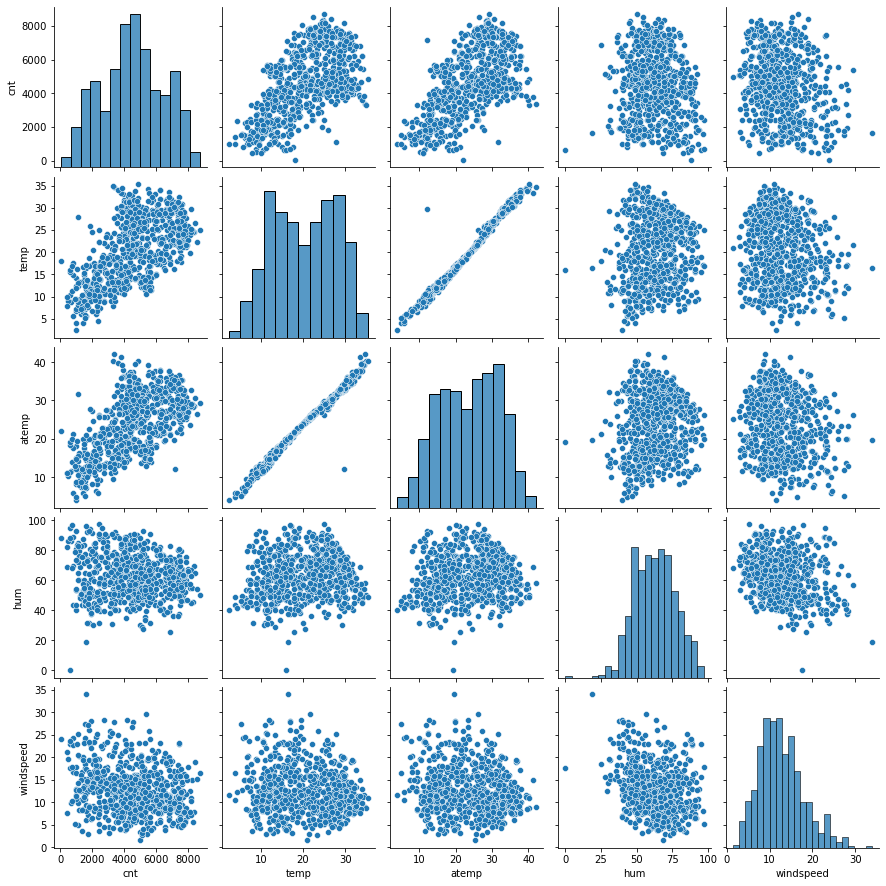

In [21]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_sharing,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

DEDUCTIONS:


•	LOOKS LIKE THE TEMP AND ATEMP HAS THE HIGHEST CORELATION WITH THE TARGET VARIABLE CNT

•	TEMP AND ATEMP ARE HIGHLY CO-RELATED WITH EACH OTHER


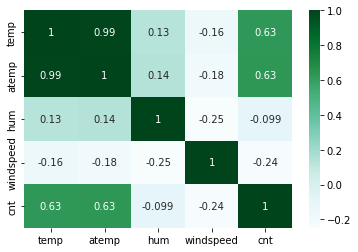

In [22]:
# Checking continuous variables relationship with each other
sns.heatmap(bike_sharing[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

DEDUCTIONS:

•	HERE WE SEE THAT TEMP AND ATEMP HAS CORRELATION MORE THAN .99 MEANS ALMOST 1 (HIGHLY CORRELATED) AND ATEMP SEEMS TO BE DERIVED FROM TEMP SO ATEMP FIELD CAN BE DROPPED HERE ONLY

•	WE CAN SEE NEGATIVE RELATIONSHIP OF WINDSPEED AND HUMIDITY WITH CNT .

•	SOME CORELATION WITH COEFF OF .63 CAN BE SEEN BETWEEN TEMP AND CNT AS WELL.


In [23]:
bike_sharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

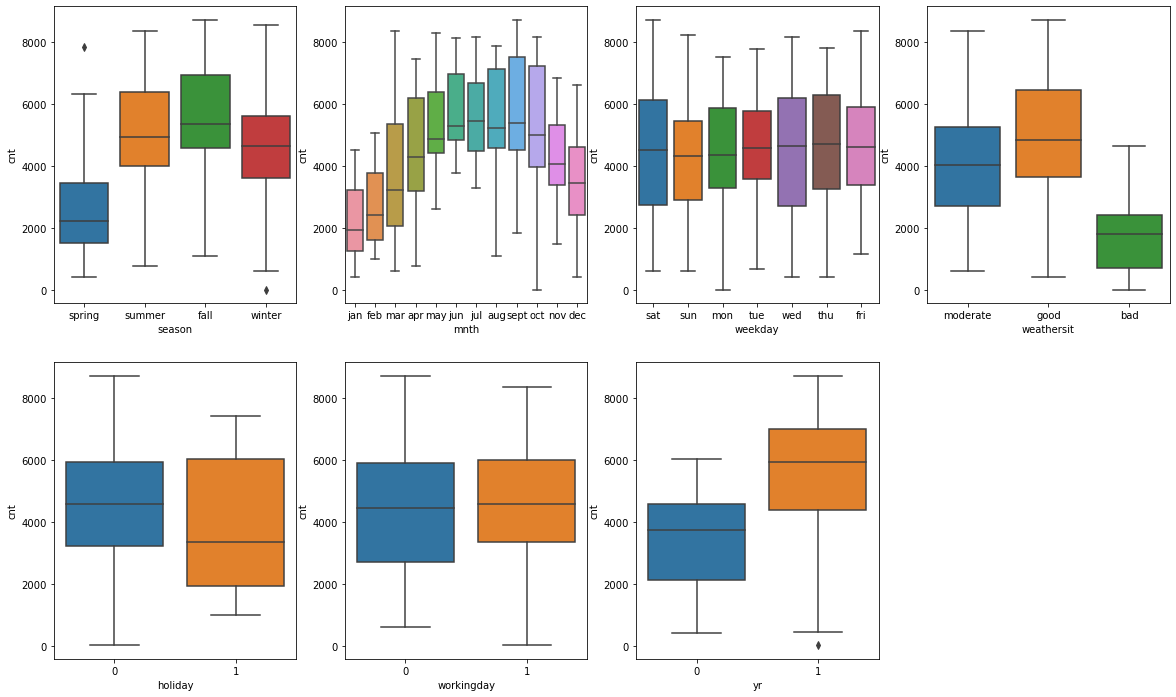

In [24]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing)
plt.show()


DEDUCTIONS:

1. SEASON FALL HAS HIGHEST DEMAND FOR RENTAL BIKES
2. DEMAND FOR NEXT YEAR HAS GROWN
3. DEMAND IS CONTINUOUSLY GROWING EACH MONTH TILL JUNE. SEPTEMBER MONTH HAS HIGHEST DEMAND. AFTER SEPTEMBER, DEMAND IS        DECREASING
4. WHEN THERE IS A HOLIDAY, DEMAND HAS DECREASED.
5. WEEKDAY IS NOT GIVING CLEAR PICTURE ABOUT DEMAND.
6. THE CLEAR WEATHERSIT HAS HIGHEST DEMAND
7. DURING SEPTEMBER, BIKE SHARING IS MORE. DURING THE YEAR END AND BEGINNING, IT IS LESS, COULD BE DUE TO EXTEREME            WEATHER CONDITIONS.



In [25]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=bike_sharing)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=bike_sharing, hue='yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

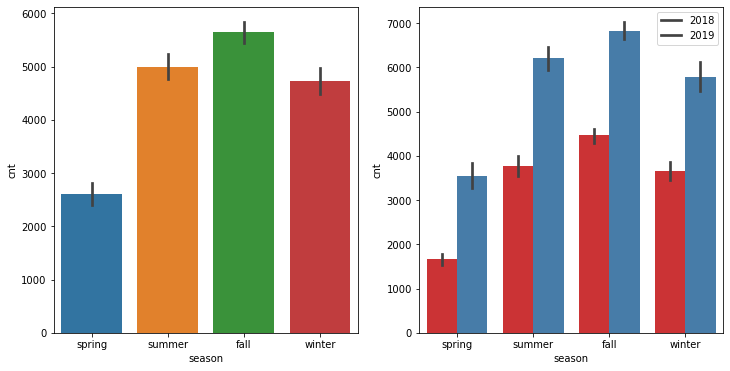

In [26]:
# plotting visualization for season column

plot_cat_columns('season')

FALL SEASON SEEMS TO HAVE ATTRACTED MORE BOOKING. AND, IN EACH SEASON THE BOOKING COUNT HAS INCREASED DRASTICALLY FROM 2018 TO 2019.

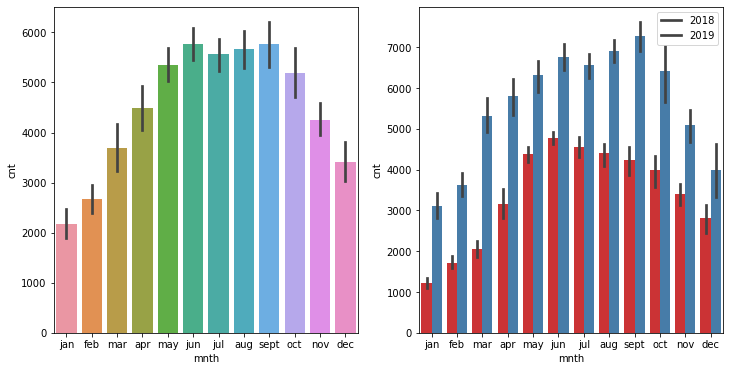

In [27]:
# plotting visualization for month column

plot_cat_columns('mnth')

MOST OF THE BOOKINGS HAS BEEN DONE DURING THE MONTH OF MAY, JUNE, JULY, AUG, SEP AND OCT. TREND INCREASED STARTING OF THE YEAR TILLMID OF THE YEAR AND THEN IT STARTED DECREASING AS WE APPROACHED THE END OF YEAR. NUMBER OF BOOKING FOR EACH MONTH SEEMS TO HAVE INCREASED FROM 2018 TO 2019.

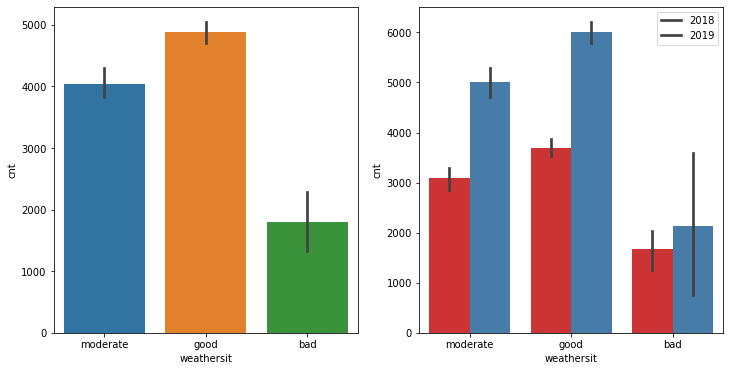

In [28]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

CLEAR WEATHER ATTRACTED MORE BOOKING WHICH SEEMS OBVIOUS. AND IN COMPARISON TO PREVIOUS YEAR, I.E 2018, BOOKING INCREASED FOR EACH WEATHER SITUATION IN 2019.

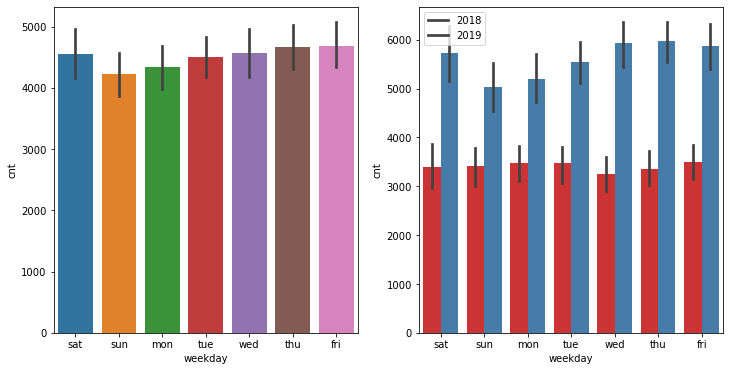

In [29]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

THU, FIR, SAT AND SUN HAVE MORE NUMBER OF BOOKINGS AS COMPARED TO THE START OF THE WEEK PRIMARILY IN 2019 . HOWEVER IN 2018 TREND WAS ALMOST SIMILAR.

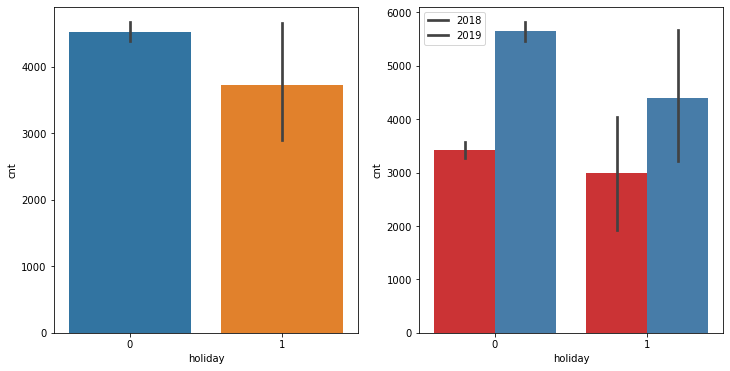

In [30]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

WHEN ITS NOT HOLIDAY, BOOKING SEEMS TO BE LESS IN NUMBER WHICH SEEMS REASONABLE AS ON HOLIDAYS, PEOPLE MAY WANT TO SPEND TIME AT HOME AND ENJOY WITH FAMILY.

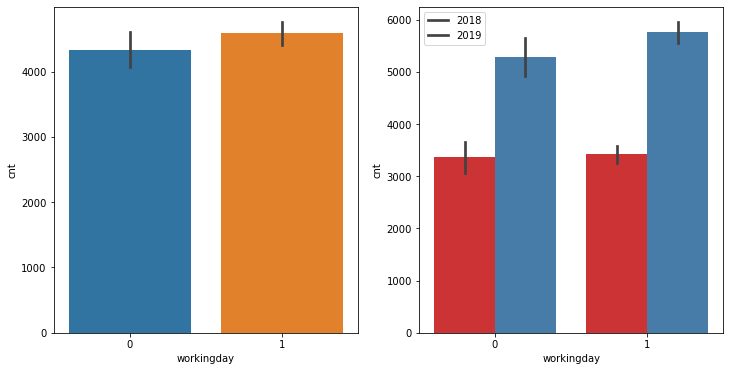

In [31]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

BOOKING SEEMED TO BE ALMOST EQUAL EITHER ON WORKING DAY OR NON-WORKING DAY. BUT, THE COUNT INCREASED FROM 2018 TO 2019.

# DATA PREPRATION

In [32]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(bike_sharing.mnth,drop_first=True)
weekdays_df=pd.get_dummies(bike_sharing.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bike_sharing.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bike_sharing.season,drop_first=True)

In [33]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [34]:
# Merging  the dataframe, with the dummy variable dataset. 

bike_sharing_new = pd.concat([bike_sharing,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [35]:
bike_sharing_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,good,moderate,spring,summer,winter
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,...,0,0,0,0,0,1,0,1,0,0
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,...,0,0,0,1,0,1,0,1,0,0
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,...,0,0,0,0,1,1,0,1,0,0


In [36]:
# dropping unnecessary columns as we have already created dummy variable out of it.

bike_sharing_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [37]:
# check the head of new dataframe
bike_sharing_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,good,moderate,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,1,0,1,0,0


In [38]:
bike_sharing_new.shape

(730, 30)

## TEST-TRAIN SPLIT

In [39]:
df_train, df_test = train_test_split(bike_sharing_new, train_size = 0.7, random_state = 100)

In [40]:
# check the shape of training datatset

df_train.shape

(510, 30)

In [41]:
# check the shape of testing datatset

df_test.shape

(220, 30)

In [42]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [43]:
# verifying the head of dataset before scaling.

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,good,moderate,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,1,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,1,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


In [44]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [45]:
# verifying the head after appying scaling.

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,good,moderate,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,1,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [46]:
# describing the dataset

df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,good,moderate,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.625490,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.484471,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## TRAINING THE MODEL

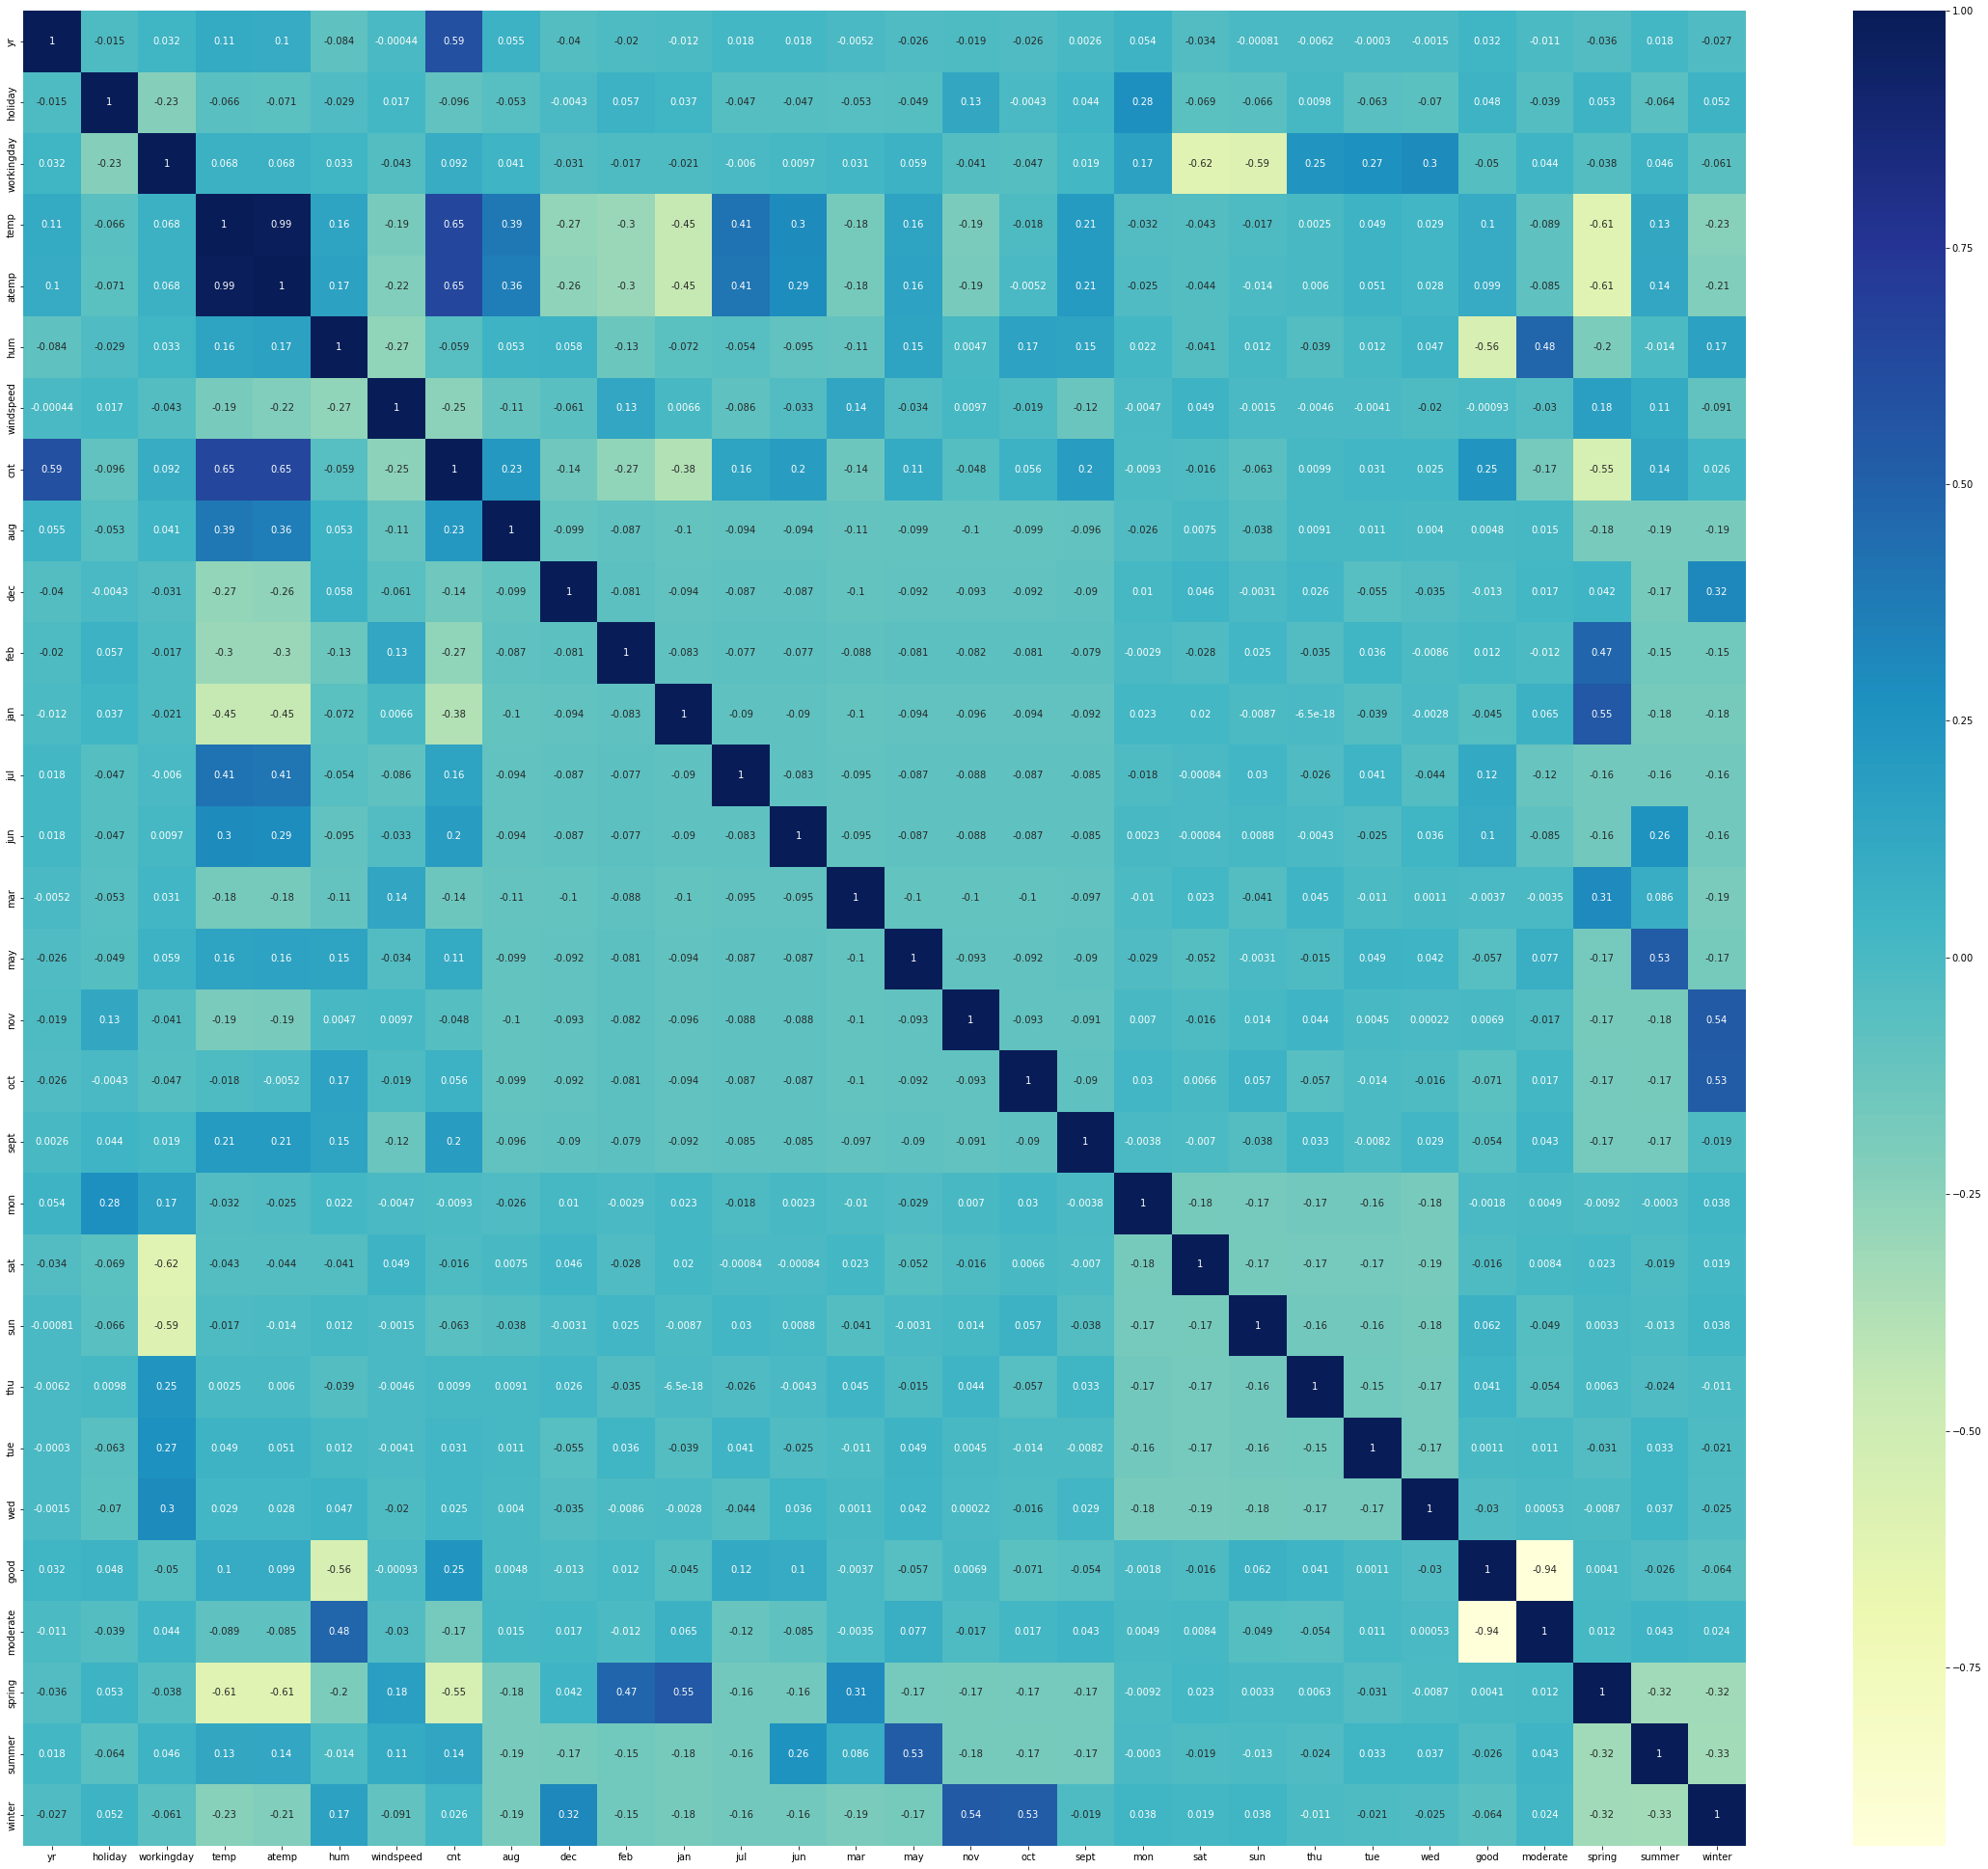

In [47]:
plt.figure(figsize= (40,35))
sns.heatmap(df_train.corr(),annot = True ,cmap="YlGnBu")
plt.show()

DEDUCTIONS:

•	CNT SEEMS TO HAVE CORRELATION WITH YEAR VARIABLE AND TEMP.

•	SPRING SEASON WITH JAN AND FEB MONTH, SUMMER SEASON WITH MAY MONTH AND WINTER SEASON WITH OCT AND NOV MONTH SHOW GOOD CORRELATION.


In [48]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   atemp       510 non-null    float64
 5   hum         510 non-null    float64
 6   windspeed   510 non-null    float64
 7   aug         510 non-null    uint8  
 8   dec         510 non-null    uint8  
 9   feb         510 non-null    uint8  
 10  jan         510 non-null    uint8  
 11  jul         510 non-null    uint8  
 12  jun         510 non-null    uint8  
 13  mar         510 non-null    uint8  
 14  may         510 non-null    uint8  
 15  nov         510 non-null    uint8  
 16  oct         510 non-null    uint8  
 17  sept        510 non-null    uint8  
 18  mon         510 non-null    uint8  
 19  sat         510 non-null   

In [50]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [51]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sept', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('good', True, 1),
 ('moderate', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [52]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jan', 'jul',
       'sept', 'sat', 'good', 'moderate', 'spring', 'summer', 'winter'],
      dtype='object')


In [53]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jun', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [54]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [55]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [56]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
4,hum,25.63
3,temp,22.84
10,good,14.80
11,moderate,9.07
12,spring,5.69
2,workingday,5.42
5,windspeed,4.69
14,winter,4.12
13,summer,3.21
0,yr,2.10


 HERE HUM,TEMP,GOOD,MODERATE   SHOWS EXTREMELY HIGH VIFs VALUES. 

## BUILDING MODEL

In [57]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          4.22e-191
Time:                        21:24:58   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.048      0.092      0.9

ADJUSTED R2 HAVE GOOD VALUE OF .84 . HOWEVER , CERTAIN VIF VALUES QUITE HIGH WHICH CAN BE DONE AWAY WITH.

In [58]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
9,good,14.79
3,temp,13.96
10,moderate,8.48
2,workingday,5.34
4,windspeed,4.67
11,spring,4.48
12,summer,2.79
13,winter,2.74
0,yr,2.08
8,sat,1.99


In [59]:
# As good shows high VIF values hence we can drop it
X_train_new = X_train_new.drop(['good'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,7.06
2,workingday,5.22
4,windspeed,4.62
10,spring,3.07
11,summer,2.34
0,yr,2.07
8,sat,1.96
12,winter,1.96
5,jan,1.62
6,jul,1.59


VIF values seems to be still high in temp .But we will see if we can reduce further .

In [60]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     150.1
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.07e-162
Time:                        21:24:59   Log-Likelihood:                 445.86
No. Observations:                 510   AIC:                            -863.7
Df Residuals:                     496   BIC:                            -804.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1652      0.036      4.630      0.0

In [61]:
# We can drop temp variable as it has high p-value and relative higher vif than holiday.
X_train_new = X_train_new.drop(['temp'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.23
2,workingday,3.82
9,spring,2.97
10,summer,2.29
11,winter,1.96
0,yr,1.90
7,sat,1.69
4,jan,1.60
8,moderate,1.54
5,jul,1.30


In [62]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     112.5
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          3.84e-133
Time:                        21:24:59   Log-Likelihood:                 373.62
No. Observations:                 510   AIC:                            -721.2
Df Residuals:                     497   BIC:                            -666.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5478      0.022     24.672      0.0

In [63]:
# We can drop jul variable as it has high p-value
X_train_new = X_train_new.drop(['jul'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.07
2,workingday,3.53
8,spring,2.68
9,summer,2.01
0,yr,1.88
10,winter,1.76
6,sat,1.62
4,jan,1.60
7,moderate,1.54
5,sept,1.20


In [64]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     122.9
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          3.81e-134
Time:                        21:24:59   Log-Likelihood:                 373.50
No. Observations:                 510   AIC:                            -723.0
Df Residuals:                     498   BIC:                            -672.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5433      0.020     26.938      0.0

In [65]:
# We can drop holiday variable as it has high p-value
X_train_new = X_train_new.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,windspeed,4.00
1,workingday,3.28
7,spring,2.65
8,summer,2.00
0,yr,1.87
9,winter,1.71
3,jan,1.60
5,sat,1.56
6,moderate,1.54
4,sept,1.18


In [66]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     134.8
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          7.93e-135
Time:                        21:25:00   Log-Likelihood:                 372.56
No. Observations:                 510   AIC:                            -723.1
Df Residuals:                     499   BIC:                            -676.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5368      0.020     27.364      0.0

In [67]:
# checking columns in this model

X_train_lm_5.columns

Index(['const', 'yr', 'workingday', 'windspeed', 'jan', 'sept', 'sat',
       'moderate', 'spring', 'summer', 'winter'],
      dtype='object')

In [92]:
# adding temp again in the columns as initially it's p value was very low 

# in the model above we are getting negative coefficients for all seasons.

cols = [ 'yr', 'workingday', 'windspeed', 'jan', 'sept', 'sat',
       'moderate', 'spring', 'summer', 'winter','temp']
# building 6th model
X_train_new = X_train[cols]
X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     174.4
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          6.97e-163
Time:                        21:36:15   Log-Likelihood:                 441.64
No. Observations:                 510   AIC:                            -859.3
Df Residuals:                     498   BIC:                            -808.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1503      0.035      4.236      0.0

In [69]:
# calculating vif for 6th model

calculateVIF(X_train_new)

,Features,VIF
10,temp,5.52
1,workingday,4.66
2,windspeed,4.60
7,spring,2.87
0,yr,2.07
8,summer,2.00
5,sat,1.83
9,winter,1.74
3,jan,1.61
6,moderate,1.55


In [70]:
# We can drop jan variable as it has high p-value
cols = [ 'yr', 'workingday', 'windspeed','sept', 'sat',
       'moderate', 'spring', 'summer', 'winter','temp']

# building 7th model
X_train_new = X_train[cols]
X_train_lm_7 = sm.add_constant(X_train_new)
lr_7 = sm.OLS(y_train,X_train_lm_7).fit()
print(lr_7.summary())

# calculating its VIF
calculateVIF(X_train[cols])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     190.6
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.59e-163
Time:                        21:25:00   Log-Likelihood:                 439.93
No. Observations:                 510   AIC:                            -857.9
Df Residuals:                     499   BIC:                            -811.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1348      0.035      3.903      0.0

,Features,VIF
9,temp,5.47
1,workingday,4.63
2,windspeed,4.58
6,spring,2.29
0,yr,2.06
7,summer,2.00
4,sat,1.82
8,winter,1.74
5,moderate,1.54
3,sept,1.22


In [71]:
# We can drop spring variable as it has high p-value
cols = [ 'yr', 'workingday', 'windspeed','sept', 'sat',
       'moderate', 'summer', 'winter','temp']

# building 8th model
X_train_new = X_train[cols]
X_train_lm_8 = sm.add_constant(X_train_new)
lr_8 = sm.OLS(y_train,X_train_lm_8).fit()
print(lr_8.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     210.0
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.38e-163
Time:                        21:25:00   Log-Likelihood:                 437.81
No. Observations:                 510   AIC:                            -855.6
Df Residuals:                     500   BIC:                            -813.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0786      0.021      3.751      0.0

In [72]:
# CALCULATING 8TH MODEL VIF
calculateVIF(X_train[cols])

,Features,VIF
8,temp,4.76
1,workingday,4.02
2,windspeed,3.40
0,yr,2.01
4,sat,1.68
6,summer,1.57
5,moderate,1.50
7,winter,1.38
3,sept,1.20


# THIS MODEL 8 IS FINAL MODEL 

- ALL P VALUES ARE 0 MAKING EVERY VARIABLE SIGNIFICANT
- VIF ALSO ENSURES NO MULTICOLINEARITY
- IT'S ADJUSTED R2 IS ALSO 0.78 WHICH IS VERY GOOD

## RESIDUAL ANALYSIS

In [73]:
X_train_lm_8


,const,yr,workingday,windspeed,sept,sat,moderate,summer,winter,temp
576,1.0,1,1,0.264686,0,0,0,0,0,0.815169
426,1.0,1,0,0.255342,0,1,1,0,0,0.442393
728,1.0,1,0,0.663106,0,0,0,0,0,0.245101
482,1.0,1,0,0.188475,0,1,1,1,0,0.395666
111,1.0,0,1,0.380981,0,0,1,1,0,0.345824
...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.187140,0,0,0,0,0,0.863973
53,1.0,0,1,0.111379,0,0,0,0,0,0.202618
350,1.0,0,0,0.431816,0,1,1,0,1,0.248216
79,1.0,0,1,0.529881,0,0,1,1,0,0.462664


In [74]:
y_train_pred = lr_8.predict(X_train_lm_8)

Text(0.5, 0, 'Errors')

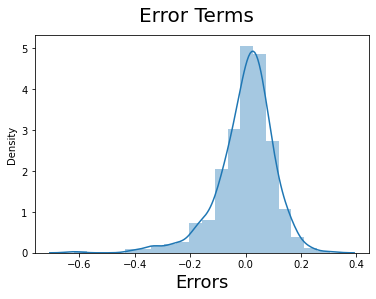

In [75]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are following normal distribution

## MULTICOLINEARITY

In [90]:
calculateVIF(X_train_new)

,Features,VIF
8,temp,4.76
1,workingday,4.02
2,windspeed,3.40
0,yr,2.01
4,sat,1.68
6,summer,1.57
5,moderate,1.50
7,winter,1.38
3,sept,1.20


HERE IT'S EVIDENT THAT ALL VIF'S ARE BELOW 5 AND MULTICOLINEARITY IS CHECKED HERE

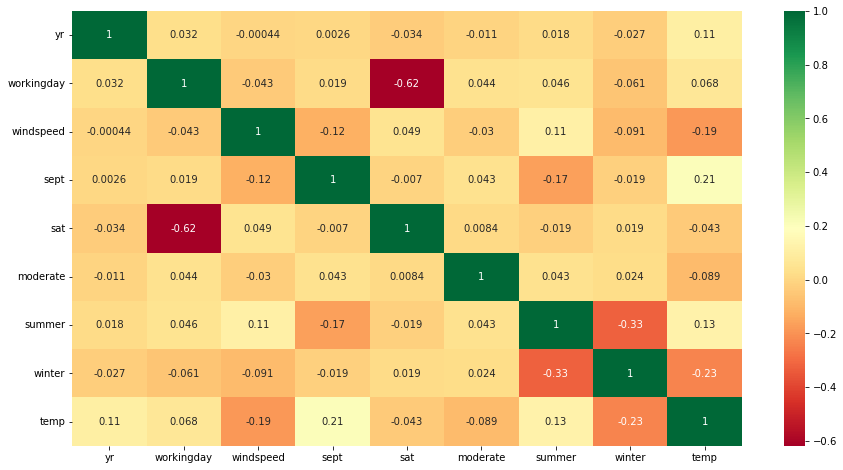

In [77]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

VIF VALUES ARE LESS THAN 5 WHICH IS GOOD AND ALSO THERE IS NO MULTICOLINEARITY AS SEEN FROM THE HEATMAP.

# HOMOSCEDASTICITY


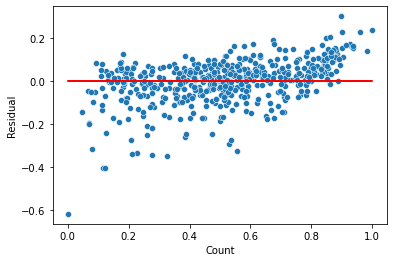

In [78]:
y_train_pred = lr_8.predict(X_train_lm_8)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

NO VISIBLE PATERNS CAN BE SEEN IN THE GRAPH

# PREDICTION ON TEST MODEL

In [79]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,good,moderate,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,1,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,1,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,1,0,0,1,0


In [80]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,good,moderate,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.654545,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.476601,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
y_test = df_test.pop('cnt')
X_test = df_test

In [82]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_8 = sm.add_constant(X_test)

In [83]:
y_pred = lr_8.predict(X_test_lm_8)

In [84]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7692

# MODEL EVALUATION

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

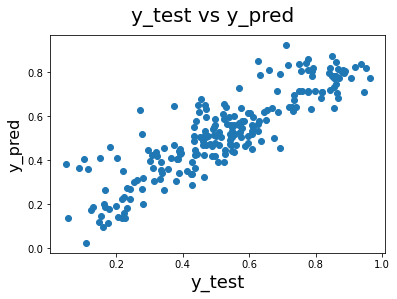

In [85]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [86]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7594


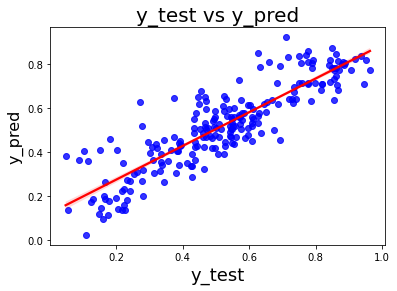

In [87]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

## COMPARISION BETWEEN TRAINING AND TESTING DATASET:

- TRAIN DATASET R^2          : 0.791

- TEST DATASET R^2           : 0.787

- TRAIN DATASET ADJUSTED R^2 : 0.769

- TEST DATASET ADJUSTED R^2  : 0.759


In [89]:
round(lr_8.params,4)

const         0.0786
yr            0.2388
workingday    0.0479
windspeed    -0.1838
sept          0.0876
sat           0.0591
moderate     -0.0663
summer        0.0886
winter        0.1161
temp          0.5514
dtype: float64

We can see that the equation of our best fitted line is:

cnt = 0.0786 + 0.2388 x yr + 0.0479 x workingday - 0.1838 x windspeed + 0.0876 x sept + 0.0591 x sat - 0.0663 x moderate + 0.0886 x summer + 0.1161 x winter + 0.5514 x temp

# Deductions


The comapany should focus on the following features:

Company should focus on expanding business during September.

Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.

There would be less bookings during moderate or bad weather, they could probably use this time to service the bikes without having business impact.

Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.
